# Tranfer Learning

Import Libraries

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2

loading data

In [11]:
# url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir =keras.utils.get_file("flower_photos", origin=url, cache_dir=".", untar=True)

In [12]:
import pathlib # accessing path of dataset
data_dir = pathlib.Path("../datasets/flower_photos/")
data_dir

WindowsPath('../datasets/flower_photos')

In [13]:
len(list(data_dir.glob("*/*.jpg"))) #list number of jpg files in folder

3670

In [14]:
roses = list(data_dir.glob("roses/*")) #list path of jpg files in roses folder
roses[:5]

[WindowsPath('../datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('../datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('../datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('../datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('../datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

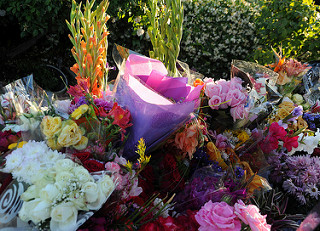

In [15]:
PIL.Image.open(str(roses[3])) #display images 

In [16]:
tulips = list(data_dir.glob("tulips/*"))
tulips[:5]

[WindowsPath('../datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('../datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('../datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('../datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('../datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

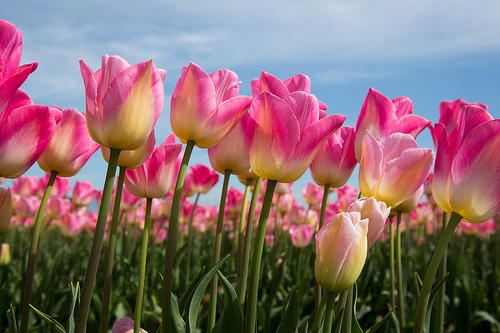

In [17]:
PIL.Image.open(str(tulips[3]))

In [18]:
# storing paths in dictionary
flowers_images = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")), 
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [19]:
#  storing classes in labels
flowers_labels = {
    "roses" : 0,
    "daisy" : 1, 
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4,
}

In [20]:
img = cv2.imread(str(flowers_images["roses"][0])) # converting images to tensors

In [21]:
img.shape # shape of tensor

(240, 179, 3)

In [22]:
cv2.resize(img, (224, 224)).shape # resize tensor shape

(224, 224, 3)

### Data Preprocessing

In [23]:
# Here we extract the images, convert them to tensors, reshape the tensors, store tensors in X, y
X, y = [], []

for flower_name, images in flowers_images.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(flowers_labels[flower_name])

In [24]:
# converting tensors to numpy array
X = np.array(X)
y = np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [26]:
X_train.shape, X_test.shape

((2752, 224, 224, 3), (918, 224, 224, 3))

In [27]:
# Scaling the dara
X_train = X_train / 255
X_test = X_test / 255

### Model Building

Raw CNN

In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax"),
    # layers.Dense(5),
])

In [ ]:
model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 27s 306ms/step - loss: 1.3622 - accuracy: 0.4182
Epoch 2/30
86/86 [==============================] - 27s 318ms/step - loss: 0.9676 - accuracy: 0.6108
Epoch 3/30
86/86 [==============================] - 29s 334ms/step - loss: 0.8218 - accuracy: 0.6850
Epoch 4/30
86/86 [==============================] - 29s 335ms/step - loss: 0.6377 - accuracy: 0.7693
Epoch 5/30
86/86 [==============================] - 29s 332ms/step - loss: 0.4524 - accuracy: 0.8365
Epoch 6/30
86/86 [==============================] - 31s 358ms/step - loss: 0.2651 - accuracy: 0.9157
Epoch 7/30
86/86 [==============================] - 33s 384ms/step - loss: 0.1776 - accuracy: 0.9437
Epoch 8/30
86/86 [==============================] - 31s 362ms/step - loss: 0.0928 - accuracy: 0.9757
Epoch 9/30
86/86 [==============================] - 33s 380ms/step - loss: 0.0503 - accuracy: 0.9876
Epoch 10/30
86/86 [==============================] - 30s 351ms/step - loss: 0.0298 - accura

Model Evaluation

In [ ]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 3s 86ms/step - loss: 2.7500 - accuracy: 0.6481


[2.750012159347534, 0.6481481194496155]

In [ ]:
predictions = model.predict(X_test)

29/29 [==============================] - 3s 95ms/step


In [ ]:
# [value.argmax() for value in predictions]

### Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

Plotting an image with augmentated form

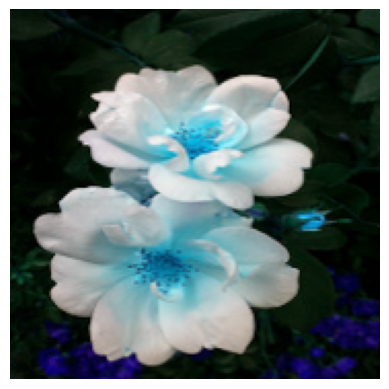

In [ ]:
plt.axis("off")
plt.imshow(X[0])

Augmented

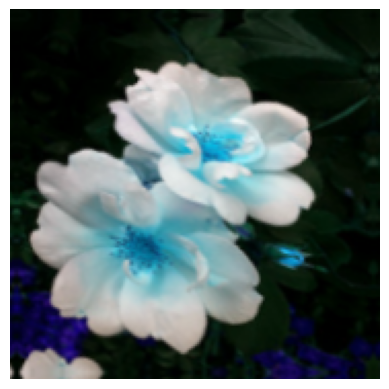

In [ ]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Data Augmentation CNN

In [ ]:
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax"),
    # layers.Dense(5),
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 36s 386ms/step - loss: 1.4598 - accuracy: 0.4611
Epoch 2/30
86/86 [==============================] - 32s 368ms/step - loss: 1.0802 - accuracy: 0.5763
Epoch 3/30
86/86 [==============================] - 53s 622ms/step - loss: 0.9595 - accuracy: 0.6217
Epoch 4/30
86/86 [==============================] - 58s 677ms/step - loss: 0.8765 - accuracy: 0.6486
Epoch 5/30
86/86 [==============================] - 58s 671ms/step - loss: 0.8301 - accuracy: 0.6897
Epoch 6/30
86/86 [==============================] - 50s 586ms/step - loss: 0.7867 - accuracy: 0.7013
Epoch 7/30
86/86 [==============================] - 45s 520ms/step - loss: 0.7142 - accuracy: 0.7333
Epoch 8/30
86/86 [==============================] - 37s 427ms/step - loss: 0.6968 - accuracy: 0.7427
Epoch 9/30
86/86 [==============================] - 36s 424ms/step - loss: 0.6619 - accuracy: 0.7435
Epoch 10/30
86/86 [==============================] - 36s 421ms/step - loss: 0.6340 - accura

In [ ]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 3s 82ms/step - loss: 1.1734 - accuracy: 0.7102


[1.1734257936477661, 0.7102396488189697]

### Transfer Learning

In [3]:
import tensorflow_hub as hub

In [4]:
image_labels = []
with open("Image_Labels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

Pretrained model with output layer

In [5]:
classifier = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
    input_shape = (224, 224, 3)                    
    )
])

Testing Pretrained model on flowers

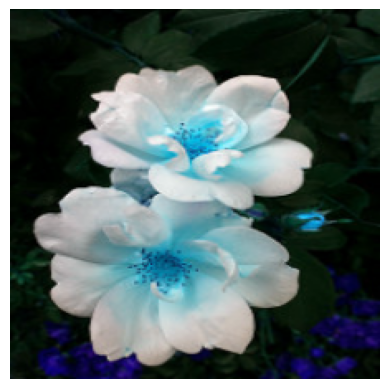

In [28]:
plt.axis("off")
plt.imshow(X[0])

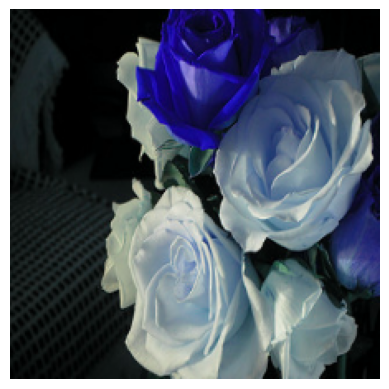

In [29]:
plt.axis("off")
plt.imshow(X[1])

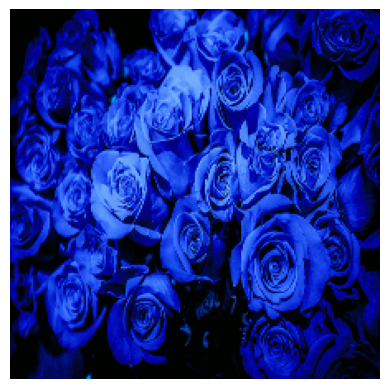

In [30]:
plt.axis("off")
plt.imshow(X[2])

In [31]:
predictions = classifier.predict(np.array([X[0], X[1], X[2]]))
[value.argmax() for value in predictions]

1/1 [==============================] - 1s 582ms/step


[795, 880, 795]

In [32]:
image_labels[795], image_labels[880]

('shower curtain', 'umbrella')

pretrained model with no output layer (feature vector)

In [33]:
pretrainer = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape = (224, 224, 3),
    trainable=False), #freezing
])

In [34]:
i = layers.Input(shape=(224, 224, 3))

x = pretrainer(i)
x = layers.Dense(5, activation="softmax")(x)

model = keras.models.Model(i, x)

In [35]:
model.compile(optimizer="rmsprop",
              loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [36]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 51s 552ms/step - loss: 0.7968 - accuracy: 0.7035
Epoch 2/5
86/86 [==============================] - 45s 519ms/step - loss: 0.4132 - accuracy: 0.8565
Epoch 3/5
86/86 [==============================] - 43s 499ms/step - loss: 0.3205 - accuracy: 0.8917
Epoch 4/5
86/86 [==============================] - 40s 461ms/step - loss: 0.2652 - accuracy: 0.9106
Epoch 5/5
86/86 [==============================] - 43s 495ms/step - loss: 0.2271 - accuracy: 0.9299


In [37]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 17s 520ms/step - loss: 0.3591 - accuracy: 0.8736


[0.3591187000274658, 0.8736383318901062]